# Домашнее задание "Деревья решений"

Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
target = data['MEDV']
features = data.drop('MEDV', axis=1)

Построим модели и посчитаем коэфицент детерминации

In [5]:
lin_reg_model = LinearRegression()
dec_tree_model = DecisionTreeRegressor()

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    
lin_reg_model.fit(x_train, y_train)
dec_tree_model.fit(x_train, y_train)

y_train_linreg_predict = lin_reg_model.predict(x_train)
y_train_dectree_predict = dec_tree_model.predict(x_train)

print(lin_reg_model.score(x_test, y_test))
print(dec_tree_model.score(x_test, y_test))

0.6687594935356311
0.8520637416662591


Стандартизируем признаки

In [6]:
lin_reg_model = LinearRegression(normalize=False)
dec_tree_model = DecisionTreeRegressor()

sc = StandardScaler()
X = sc.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)
    
lin_reg_model.fit(x_train, y_train)
dec_tree_model.fit(x_train, y_train)

y_train_linreg_predict = lin_reg_model.predict(x_train)
y_train_dectree_predict = dec_tree_model.predict(x_train)

print(lin_reg_model.score(x_test, y_test))
print(dec_tree_model.score(x_test, y_test))

0.6687594935356318
0.8502736456948439


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [8]:
def make_regression(x_train, y_train, x_test, y_test):
    model = LinearRegression(normalize=False)
    model.fit(x_train, y_train)

    print("MSE TRAIN:", mean_squared_error(y_train,model.predict(x_train)))
    print("MSE TEST:", mean_squared_error(y_test,model.predict(x_test)))
    
    return model.score(x_test, y_test)

In [9]:
def lin_poly_model(X, y, random_seed=42, degrees=None):
    
    sc = StandardScaler()
    X_st = sc.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_st, y, test_size=0.2, random_state=random_seed)
    
    if degrees is not None:
        polynomial_features= PolynomialFeatures(degree=degrees)
        x_train_poly = polynomial_features.fit_transform(x_train)
        x_test_poly = polynomial_features.fit_transform(x_test)
        m = make_regression(x_train_poly, y_train, x_test_poly, y_test)
        
        return m
    
    m = make_regression(x_train, y_train, x_test, y_test)
    
    return m

In [10]:
def dec_tree_model(X, y, random_seed=42, depth=None):
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    
    if depth is not None:
        dec_tree_model = DecisionTreeRegressor(max_depth=depth)
        dec_tree_model.fit(x_train, y_train)
        y_train_dectree_predict = dec_tree_model.predict(x_train)
        
        print("MSE TRAIN:", mean_squared_error(y_train,dec_tree_model.predict(x_train)))
        print("MSE TEST:", mean_squared_error(y_test,dec_tree_model.predict(x_test)))
        
        return dec_tree_model.score(x_test, y_test)
    
    dec_tree_model = DecisionTreeRegressor()
    dec_tree_model.fit(x_train, y_train)
    y_train_dectree_predict = dec_tree_model.predict(x_train)
    
    print("MSE TRAIN:", mean_squared_error(y_train,dec_tree_model.predict(x_train)))
    print("MSE TEST:", mean_squared_error(y_test,dec_tree_model.predict(x_test)))
    
    return dec_tree_model.score(x_test, y_test)

In [11]:
lin_poly_model(features, target)

MSE TRAIN: 21.641412753226312
MSE TEST: 24.291119474973527


0.6687594935356318

In [12]:
# Оптимальное количество степеней
lin_poly_model(features, target, degrees=2)

MSE TRAIN: 5.131505391356527
MSE TEST: 14.255843802496207


0.8056033223960374

In [17]:
# Модель переобучилась
lin_poly_model(features, target, degrees=3)

MSE TRAIN: 1.2887236206830211e-23
MSE TEST: 7392.93534542781


-99.81213632829102

Построим DecisionTreeRegressor

In [18]:
dec_tree_model(features, target)

MSE TRAIN: 0.0
MSE TEST: 22.239313725490195


0.6967384912234732

In [19]:
for i in range(1, 20):
    print(f'Глубина дерева: {i}')
    d = dec_tree_model(features, target, depth=i) 
    print(f'r2: {d}')

Глубина дерева: 1
MSE TRAIN: 46.01995731379241
MSE TEST: 46.91780325106487
r2: 0.3602156982888397
Глубина дерева: 2
MSE TRAIN: 25.65463728163162
MSE TEST: 25.993190895971196
r2: 0.6455495710736121
Глубина дерева: 3
MSE TRAIN: 15.901624015343652
MSE TEST: 16.76656715064249
r2: 0.7713663958398644
Глубина дерева: 4
MSE TRAIN: 9.712307066760658
MSE TEST: 10.616592447744544
r2: 0.855229172828375
Глубина дерева: 5
MSE TRAIN: 7.078696760120875
MSE TEST: 20.356259525823308
r2: 0.7224163455290411
Глубина дерева: 6
MSE TRAIN: 5.065652945127753
MSE TEST: 9.220745142864546
r2: 0.8742633375029067
Глубина дерева: 7
MSE TRAIN: 3.2561688732661764
MSE TEST: 19.76246775500877
r2: 0.7305134563724349
Глубина дерева: 8
MSE TRAIN: 1.9490192185625448
MSE TEST: 10.000077239474747
r2: 0.8636361468272749
Глубина дерева: 9
MSE TRAIN: 1.1317352917842687
MSE TEST: 8.201400307265232
r2: 0.888163409088888
Глубина дерева: 10
MSE TRAIN: 0.5517380958158841
MSE TEST: 23.018923967610874
r2: 0.686107507677782
Глубина дере

Лучший результат при глубине = 9

# Вывод: для этой задачи больше подходит модель DecisionTreeRegressor, так как она дает меньшую среднеквадратичную ошибку на тренировочных и тестовых данных и у нее выше значение r2 

''

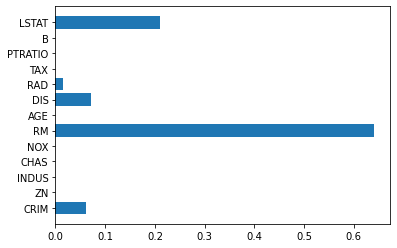

In [33]:
clf = DecisionTreeRegressor(max_depth=3, random_state=42)
clf.fit(features, target)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(features.columns)),features.columns)
''

In [31]:
from sklearn import tree

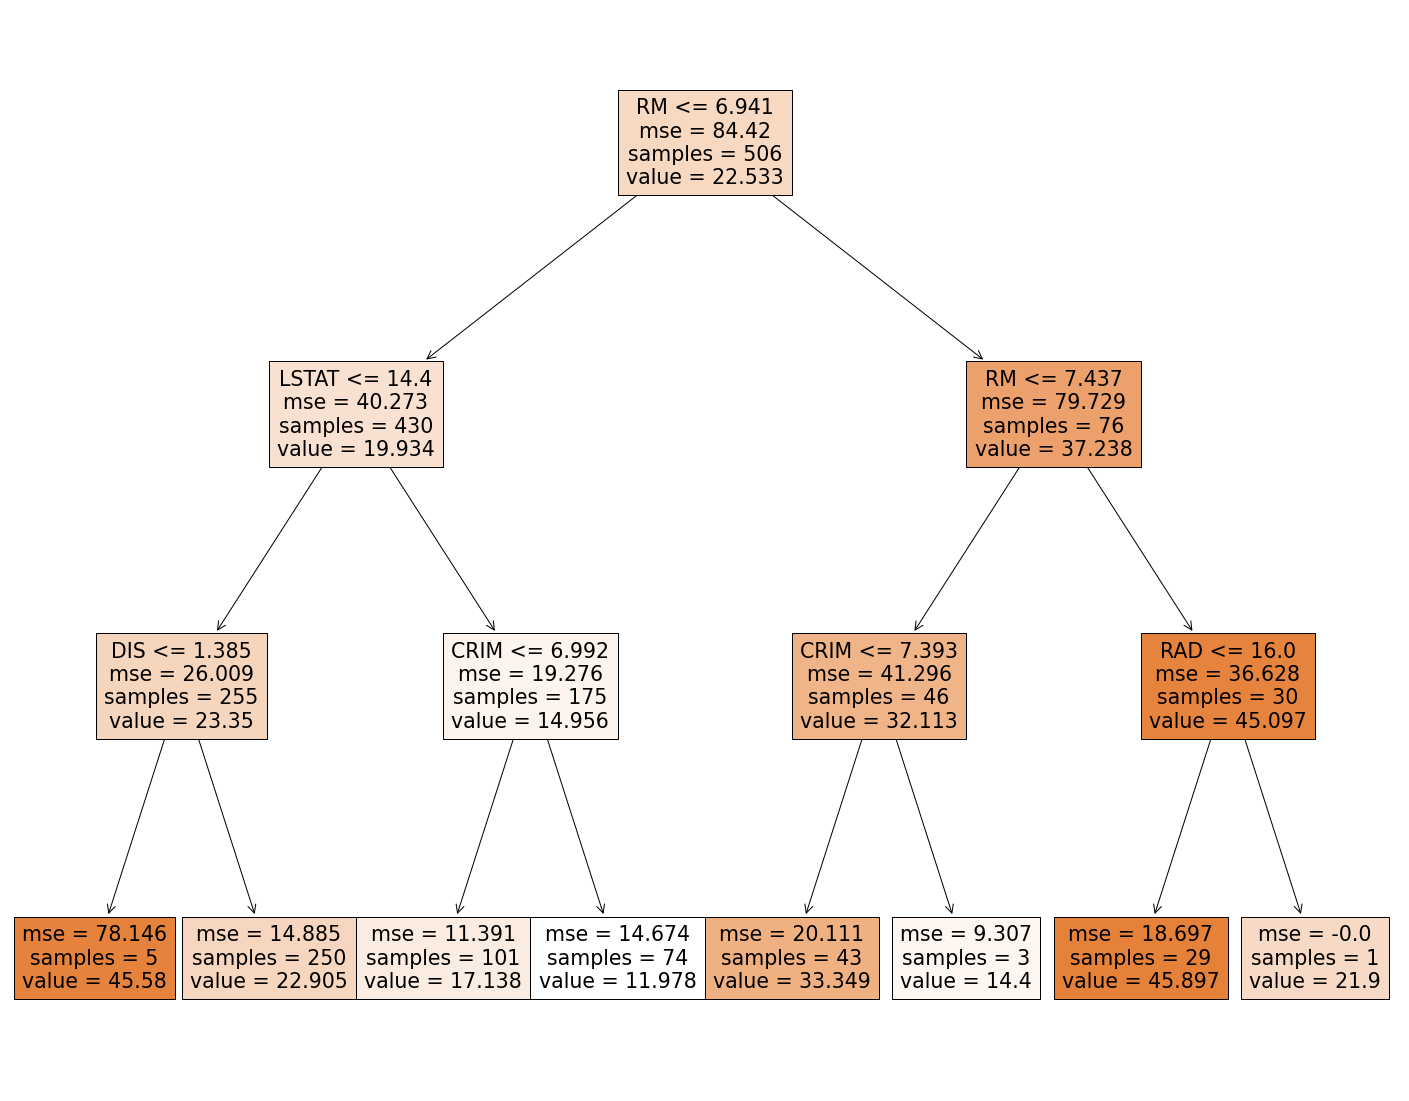

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=load_boston()['feature_names'],
                   filled=True)